## Лабораторная работа №2. Понижение размерности пространства признаков.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis

### Загрузка датасета

In [2]:
df = pd.read_csv('datasets/glass.csv')

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Разделение данных на описательные признаки и признак отображающий класс

In [3]:
var_names = list(df.columns)

labels = df.to_numpy('int')[:, -1]
data = df.to_numpy('float')[:, :-1]

Нормировка данных к интервалу [0 1]

In [4]:
data = preprocessing.minmax_scale(data)

Диаграммы рассеяния для пар признаков

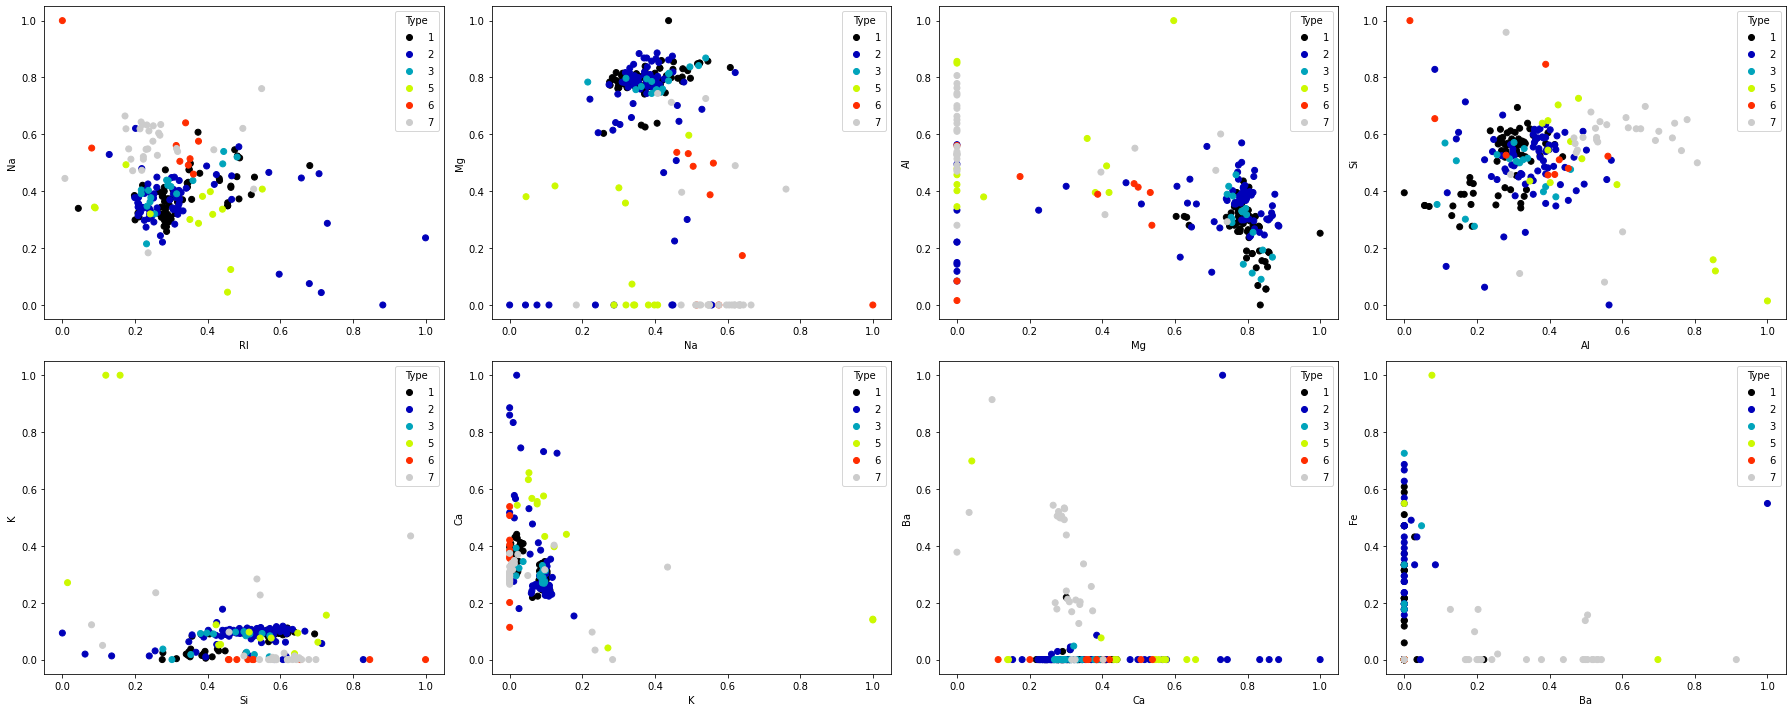

In [5]:
fig, axs = plt.subplots(2, 4, figsize=(25, 10))

for i in range(data.shape[1] - 1):    
    scatter = axs[i // 4, i % 4].scatter(data[:, i], data[:, (i + 1)], c=labels, cmap='nipy_spectral')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i + 1])
    legend = axs[i // 4, i % 4].legend(*scatter.legend_elements(), loc="upper right", title="Type")

fig.tight_layout()
plt.show()

### Метод главных компонент

Понижение размерности пространства до размерности 2 с помощью метода главных компонент

In [6]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(data)

Значение объясненной дисперсии и собственные числа, соответствующие компонентам

In [7]:
pca.explained_variance_ratio_, pca.singular_values_

(array([0.45429569, 0.17990097]), array([5.1049308 , 3.21245688]))

Диаграмма рассеяния после метода главных компонент

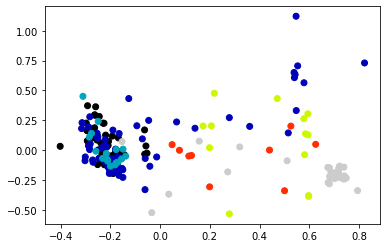

In [8]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.show()

Определим количество компонент, при котором объясняется не менее 85% дисперсии данных

In [9]:
pca = PCA(n_components = 9)
pca_data = pca.fit_transform(data)
var_ratio = pd.DataFrame(pca.explained_variance_ratio_).T
var_ratio

,0,1,2,3,4,5,6,7,8
0,0.454296,0.179901,0.126495,0.097978,0.068624,0.042141,0.026098,0.004328,0.000139


In [10]:
var_ratio.loc[:, 0:3].sum(axis=1) # Первые 4 компоненты объясняют не менее 85% дисперсии

0    0.85867
dtype: float64

Восстановление данных с помощью inverse_transform при 4   компонентах

In [11]:
pca = PCA(n_components = 4)
pca_data = pca.fit_transform(data)
data_inverse = pca.inverse_transform(pca_data)

In [12]:
df_inverse = pd.DataFrame(data_inverse, columns=var_names[:-1])
df_original = pd.DataFrame(data, columns=var_names[:-1])
df_inverse.describe() # Восстановленные данные

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.130009,0.068790,0.320561,0.135910,0.129659,0.043794,0.128754,0.132283,0.188632
min,0.047103,0.255928,-0.076776,0.087427,-0.170154,-0.089399,-0.033157,-0.109690,-0.170306
25%,0.242959,0.369582,0.470966,0.293468,0.457136,0.064522,0.261130,-0.020217,-0.000465
50%,0.279815,0.400371,0.769452,0.333850,0.533327,0.081614,0.293777,0.006544,0.018540
75%,0.363286,0.421375,0.800550,0.379242,0.572367,0.102750,0.367761,0.069990,0.191226
max,0.997887,0.671754,0.991335,0.900420,0.988367,0.273920,0.974468,0.688149,0.990835


In [13]:
df_original.describe() # Первоначальные данные

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Исследование метода главных компонент при различных параметрах svd_solver

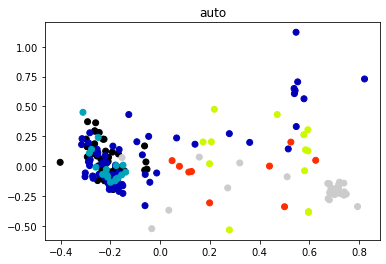

In [14]:
pca_auto = PCA(n_components = 2, svd_solver='auto') # При svd_solver = auto
pca_auto_data = pca.fit_transform(data)

plt.scatter(pca_auto_data[:, 0], pca_auto_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('auto')
plt.show()

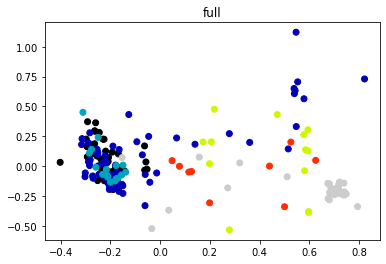

In [15]:
pca_full = PCA(n_components = 2, svd_solver='full') # При svd_solver = full
pca_full_data = pca.fit_transform(data)

plt.scatter(pca_full_data[:, 0], pca_full_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('full')
plt.show()

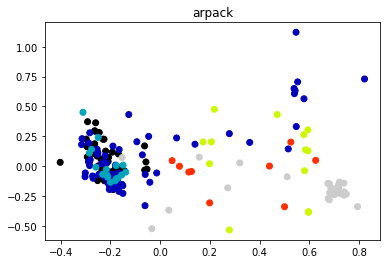

In [16]:
pca_arpack = PCA(n_components = 2, svd_solver='arpack') # При svd_solver = arpack
pca_arpack_data = pca.fit_transform(data)

plt.scatter(pca_arpack_data[:, 0], pca_arpack_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('arpack')
plt.show()

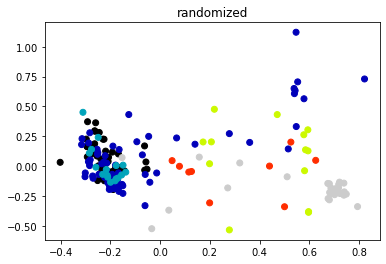

In [17]:
pca_randomized = PCA(n_components = 2, svd_solver='randomized') # При svd_solver = randomized
pca_randomized_data = pca.fit_transform(data)

plt.scatter(pca_randomized_data[:, 0], pca_randomized_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('randomized')
plt.show()

### Модификации метода главных компонент

KernelPCA

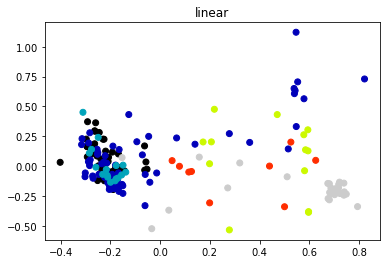

In [18]:
kernel_pca = KernelPCA(n_components=2, kernel='linear')
kernel_pca_data = kernel_pca.fit_transform(data)

plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('linear')
plt.show()

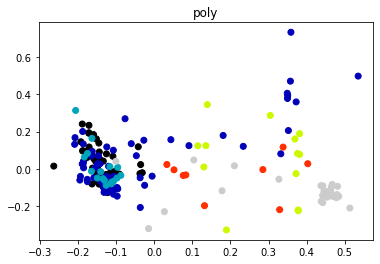

In [19]:
kernel_pca = KernelPCA(n_components=2, kernel='poly')
kernel_pca_data = kernel_pca.fit_transform(data)

plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('poly')
plt.show()

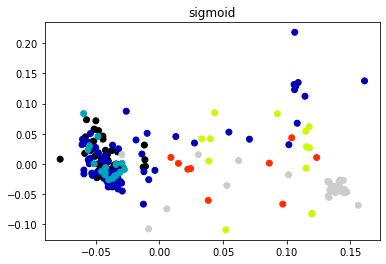

In [20]:
kernel_pca = KernelPCA(n_components=2, kernel='sigmoid')
kernel_pca_data = kernel_pca.fit_transform(data)

plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('sigmoid')
plt.show()

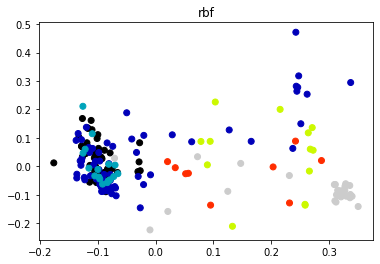

In [21]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kernel_pca_data = kernel_pca.fit_transform(data)

plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('rbf')
plt.show()

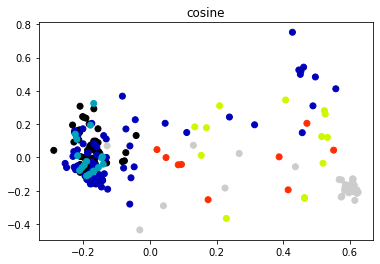

In [22]:
kernel_pca = KernelPCA(n_components=2, kernel='cosine')
kernel_pca_data = kernel_pca.fit_transform(data)

plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('cosine')
plt.show()

SparsePCA

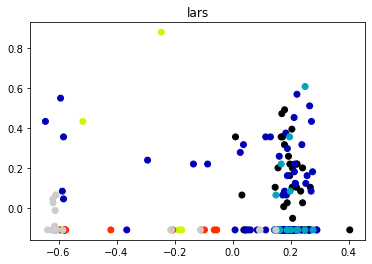

In [23]:
sparse_pca = SparsePCA(n_components=2, method='lars')
sparse_pca_data = sparse_pca.fit_transform(data)

plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('lars')
plt.show()

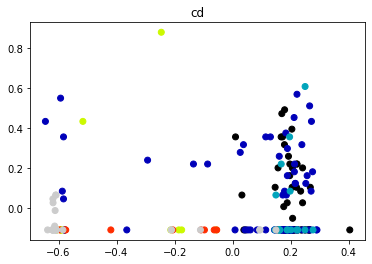

In [24]:
sparse_pca = SparsePCA(n_components=2, method='cd')
sparse_pca_data = sparse_pca.fit_transform(data)

plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('cd')
plt.show()

### Факторный анализ

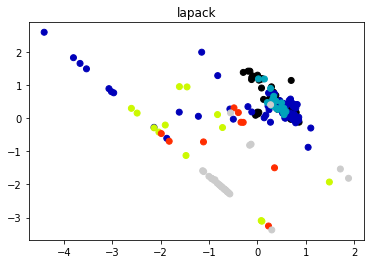

In [25]:
factor_analysis = FactorAnalysis(n_components=2, svd_method='lapack')
factor_analysis_data = factor_analysis.fit_transform(data)

plt.scatter(factor_analysis_data[:, 0], factor_analysis_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('lapack')
plt.show()

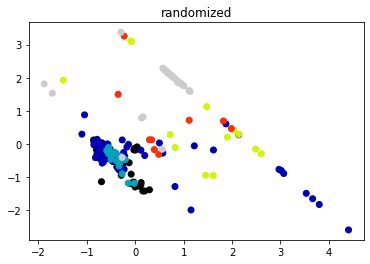

In [26]:
factor_analysis = FactorAnalysis(n_components=2, svd_method='randomized')
factor_analysis_data = factor_analysis.fit_transform(data)

plt.scatter(factor_analysis_data[:, 0], factor_analysis_data[:, 1], c=labels, cmap='nipy_spectral')
plt.title('randomized')
plt.show()